In [91]:
import pandas as pd
import os
import glob
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation

In [92]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/notebooks/CBE_utils.py'>

In [93]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_output_files/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_result_files/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/annotation_files/"

In [94]:
# load normalized data
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4]_mad_robustize.csv"
files = glob.glob(input_path + os.sep + '*' + os.sep + os.sep + '*' + os.sep + pattern, recursive=True)

# TODO: needs to change in the future
# TODO: process only what is not processed yet
Data = []

for file in files:
    
    filename = os.path.basename(file)
    
    try:
        
        Data_Temp = pd.read_csv(file)
        row_count = Data_Temp.shape[0]
        
        print(f"File: {filename} has {row_count} rows")
        
        Data.append(Data_Temp)
            
    except Exception as e:
        
        print(f"Error reading file {filename}: {e}")
        
        
### concat all files together
Data_aggregated = pd.concat(Data)
Data_aggregated = Data_aggregated.reset_index(drop = True)

print("Aggregated Data has shape ", Data_aggregated.shape)

File: C1231_R1_mad_robustize.csv has 384 rows
File: C1241_R1_mad_robustize.csv has 384 rows
File: C1230_R3_mad_robustize.csv has 384 rows
File: C1230_R4_mad_robustize.csv has 384 rows
File: C1231_R4_mad_robustize.csv has 384 rows
File: C1241_R2_mad_robustize.csv has 384 rows
File: C1230_R2_mad_robustize.csv has 384 rows
File: C1231_R2_mad_robustize.csv has 384 rows
File: C1241_R3_mad_robustize.csv has 384 rows
File: C1230_R1_mad_robustize.csv has 384 rows
File: C1231_R3_mad_robustize.csv has 384 rows
File: C1162_R4_mad_robustize.csv has 384 rows
File: C1175_R1_mad_robustize.csv has 384 rows
File: C1160_R2_mad_robustize.csv has 384 rows
File: C1160_R3_mad_robustize.csv has 384 rows
File: C1165_R2_mad_robustize.csv has 384 rows
File: C1176_R1_mad_robustize.csv has 384 rows
File: C1167_R1_mad_robustize.csv has 384 rows
File: C1166_R1_mad_robustize.csv has 384 rows
File: C1158_R4_mad_robustize.csv has 384 rows
File: C1158_R2_mad_robustize.csv has 384 rows
File: C1170_R1_mad_robustize.csv h


# Comparison over plates

In [95]:
# TODO: Correlation of pos. & neg. controls over time
# TODO: Compute consensus per normalized plate for pos. controls
# TODO: Implement consensus of first plates of specific source
# TODO: Then with an external control from the bioactives
# TODO: Create reference point for pos. controls and compare plates to this

In [97]:
# Gets the feature and metadata columns
features_columns = CBE.get_feature_vector(Data_aggregated)
metadata_columns = set(Data_aggregated.columns) - set(features_columns)

columns_to_drop = [
    'Metadata_imaging_date',
    'Metadata_imaging_time',
    'Metadata_Plate',
    'Metadata_plate_name',
    'Metadata_replicate_number',
    'Metadata_source',
    'Metadata_user',
    'Metadata_RoughID']

In [98]:
Data_aggregated.head()

,Metadata_Well,Metadata_instrument,Metadata_imaging_time,Metadata_source,Metadata_imaging_timezone,Metadata_Batch,Metadata_Well_randomized,Metadata_plate_name,Metadata_Plate,Metadata_RoughID,...,Cyto_Texture_Variance_Mito_10_02_256,Cyto_Texture_Variance_Mito_10_03_256,Cyto_Texture_Variance_Mito_3_00_256,Cyto_Texture_Variance_Mito_3_01_256,Cyto_Texture_Variance_Mito_3_02_256,Cyto_Texture_Variance_Mito_3_03_256,Cyto_Texture_Variance_Mito_5_00_256,Cyto_Texture_Variance_Mito_5_01_256,Cyto_Texture_Variance_Mito_5_02_256,Cyto_Texture_Variance_Mito_5_03_256
0,O02,CV8000,12:02:30,IMTM,200,HepG2_10uM,A01,C1231,C1231R1,EOS_cpd,...,-0.388569,-0.397480,-0.337381,-0.377193,-0.220344,-0.300281,-0.445350,-0.339305,-0.324083,-0.251298
1,K17,CV8000,12:02:30,IMTM,200,HepG2_10uM,A02,C1231,C1231R1,EOS_cpd,...,-1.846548,-1.797749,-1.870155,-2.100688,-1.731961,-1.689617,-1.989911,-1.850223,-1.785348,-1.653460
2,I19,CV8000,12:02:30,IMTM,200,HepG2_10uM,A03,C1231,C1231R1,EOS_cpd,...,-1.222520,-1.225155,-1.187286,-1.342566,-1.066288,-1.090041,-1.269058,-1.270187,-1.118566,-1.117101
3,B09,CV8000,12:02:30,IMTM,200,HepG2_10uM,A04,C1231,C1231R1,EOS_cpd,...,-1.274747,-1.309010,-1.318618,-1.404711,-1.210333,-1.170232,-1.347972,-1.327596,-1.237409,-1.137469
4,N10,CV8000,12:02:30,IMTM,200,HepG2_10uM,A05,C1231,C1231R1,EOS_cpd,...,-0.256909,-0.259292,-0.174461,-0.214816,-0.241352,-0.162724,-0.293659,-0.256376,-0.244783,-0.154303


Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created


<ipython-input-110-50c1466f668b>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created


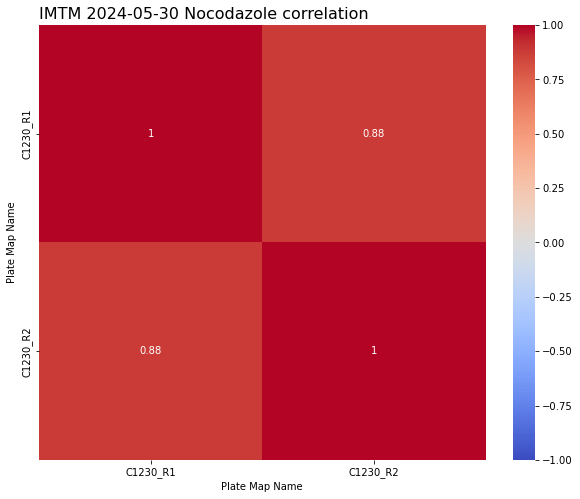

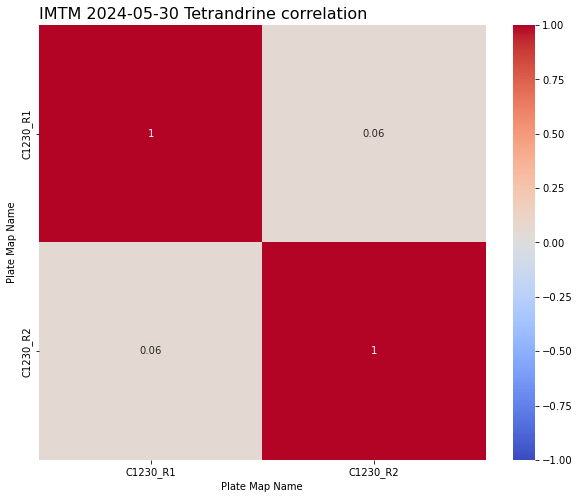

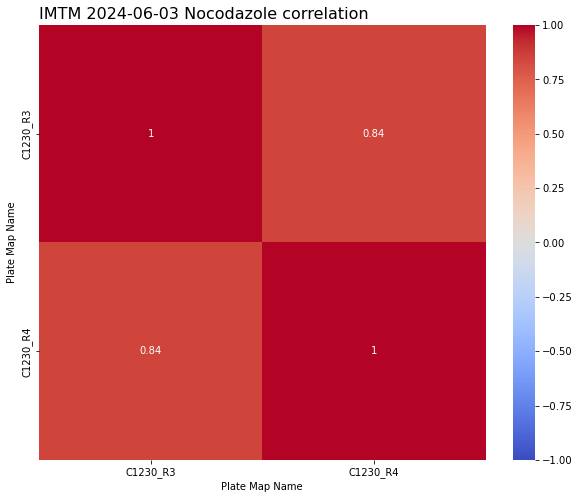

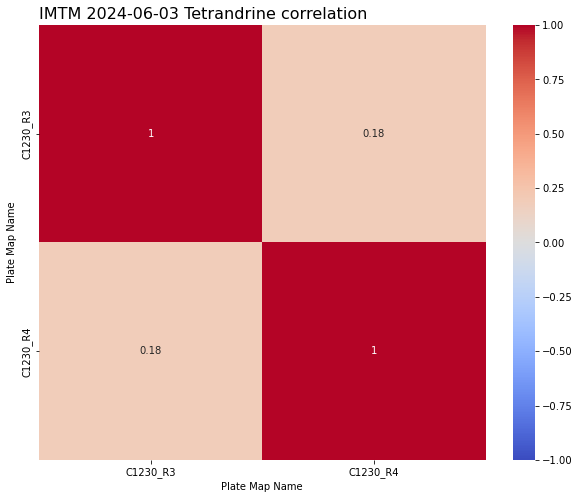

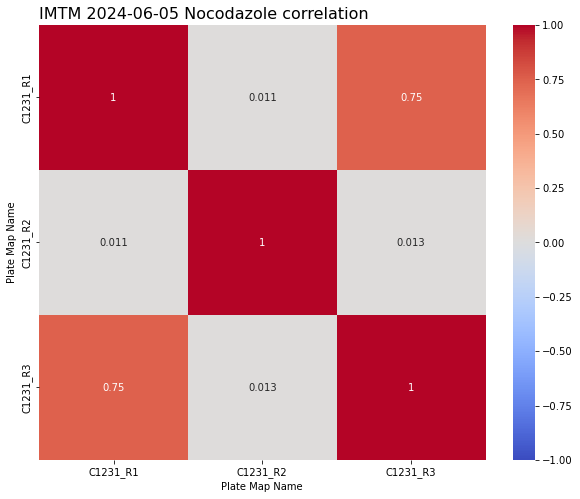

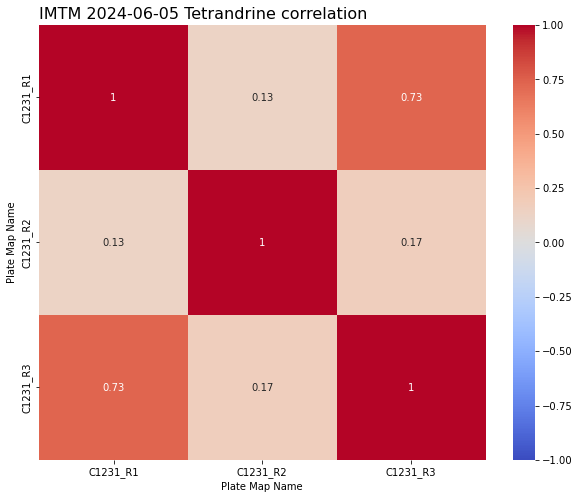

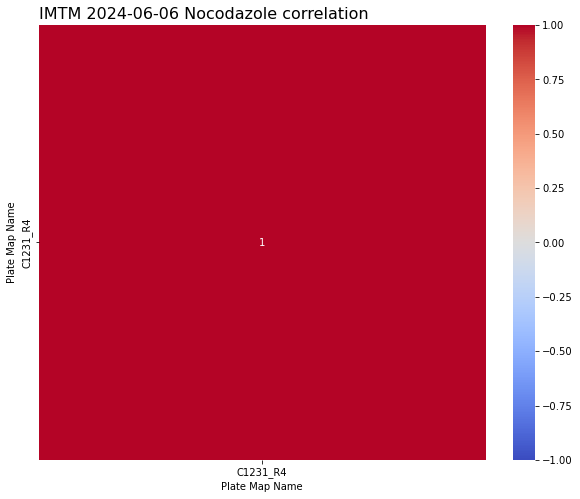

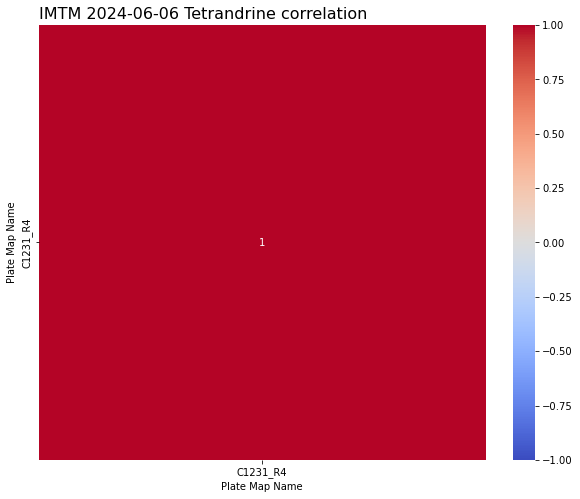

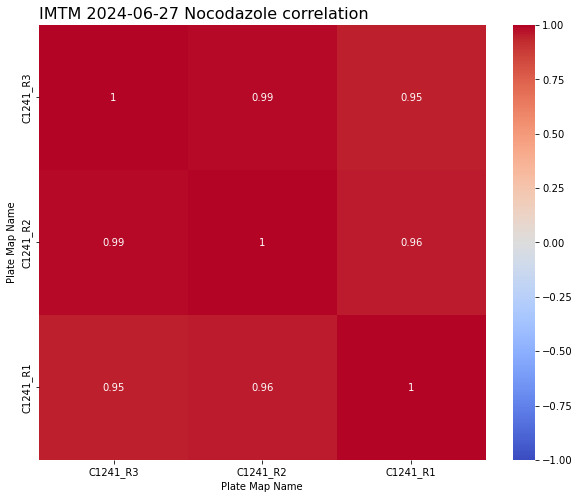

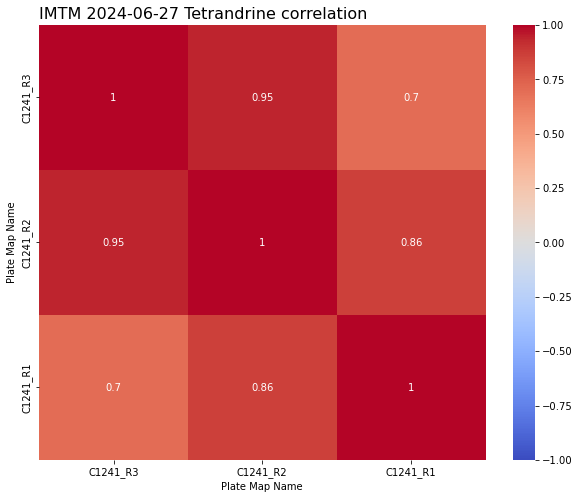

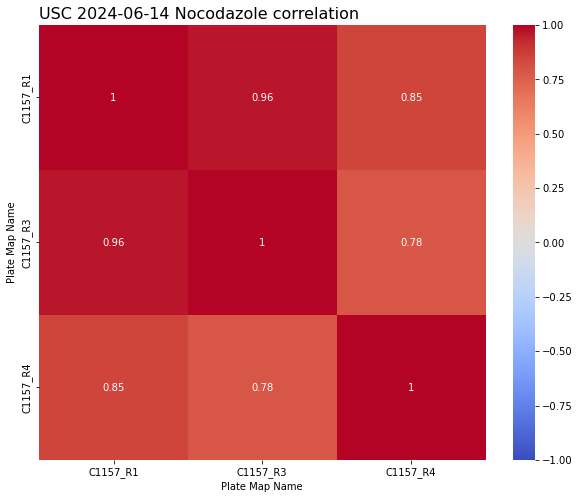

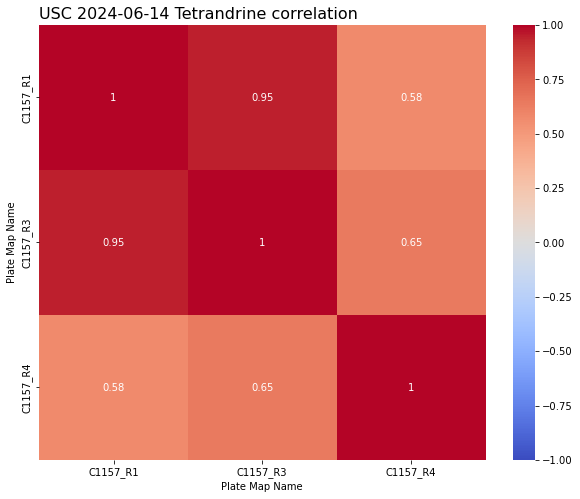

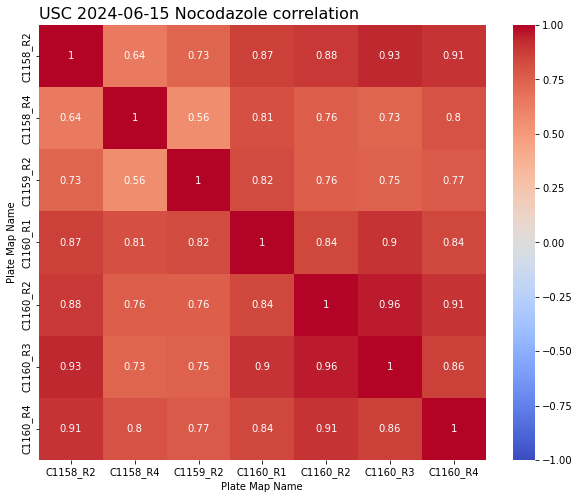

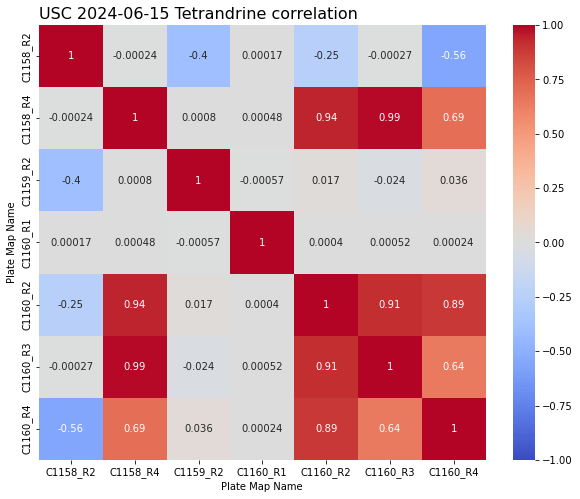

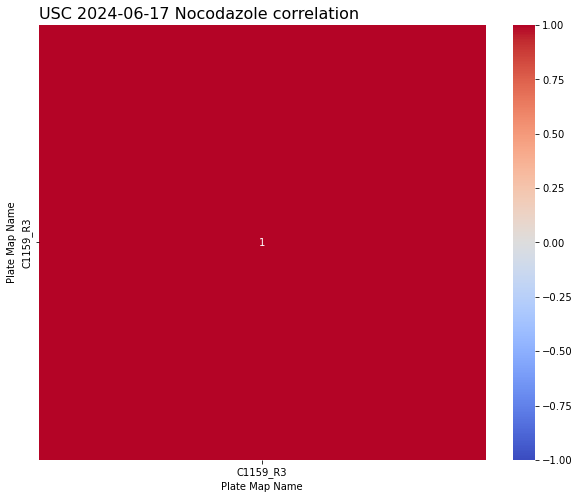

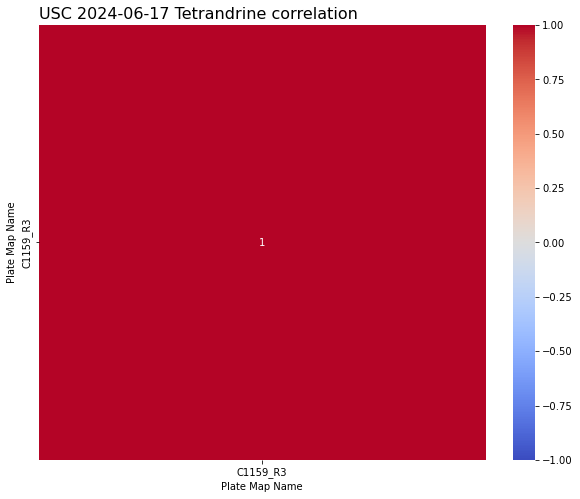

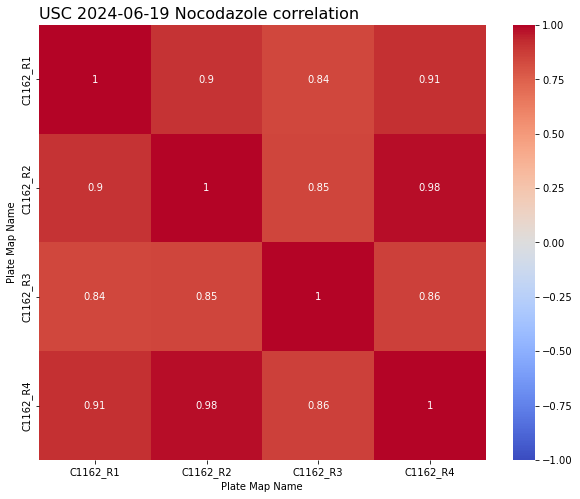

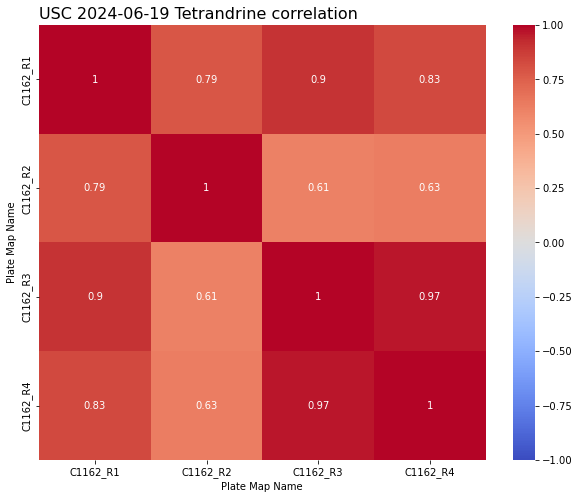

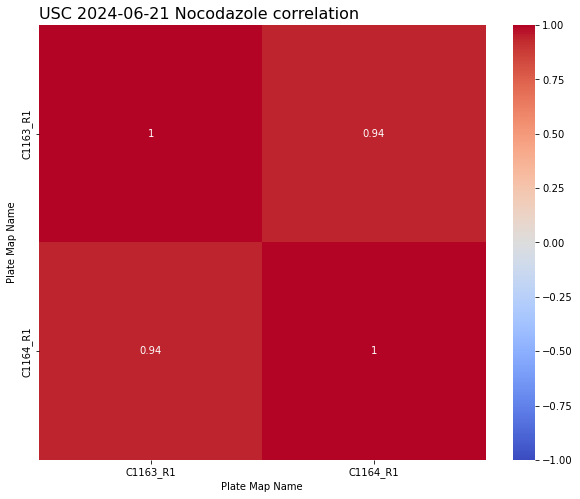

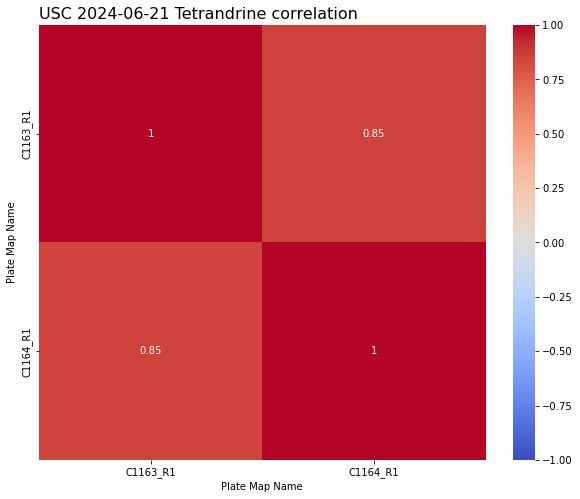

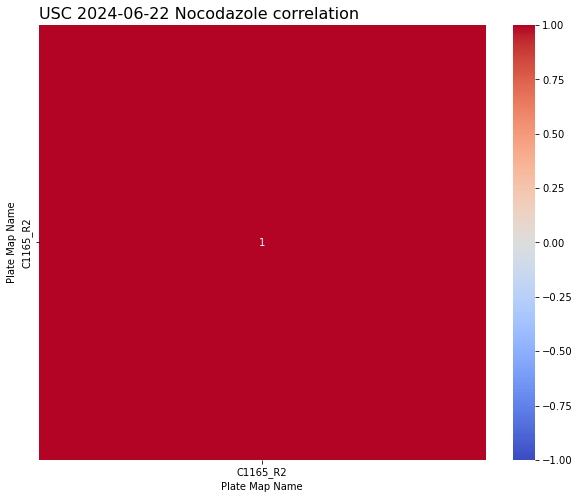

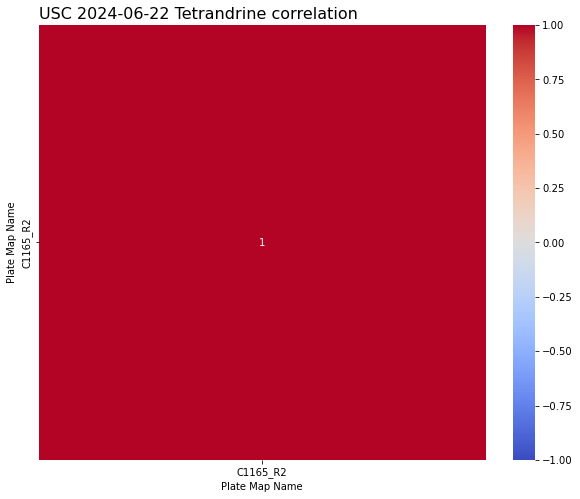

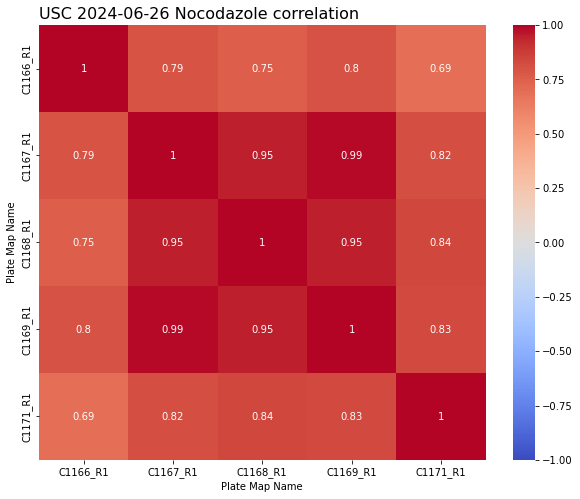

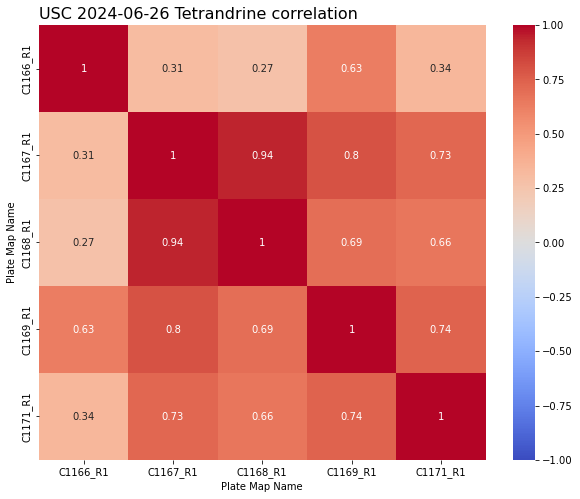

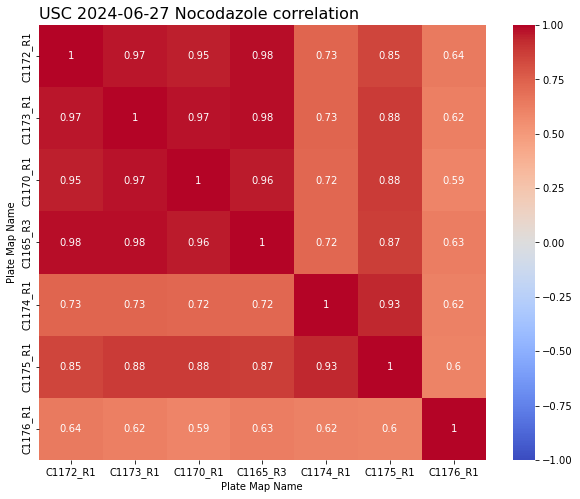

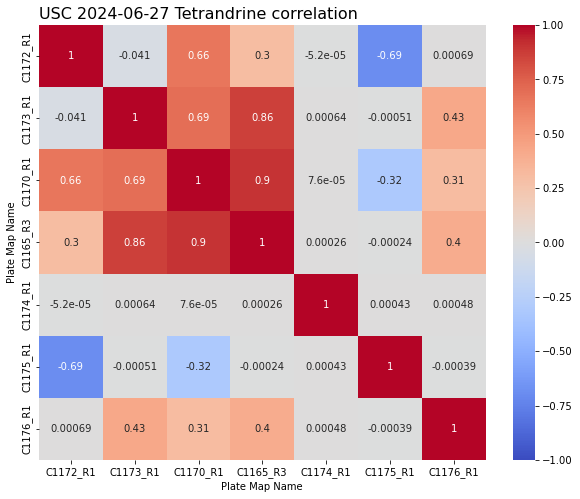

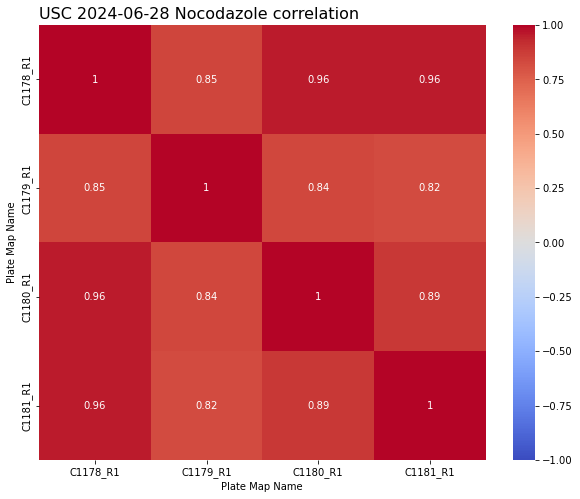

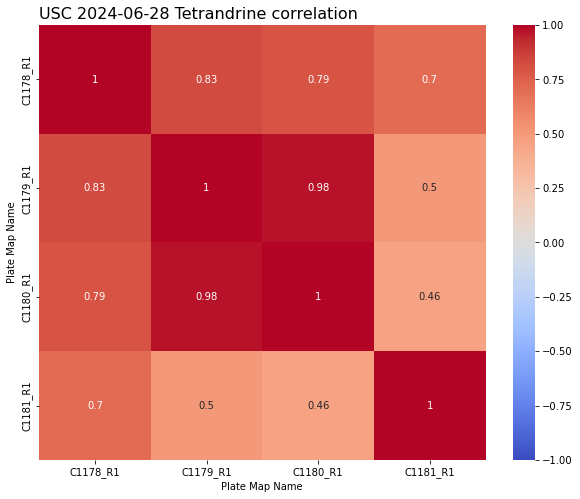

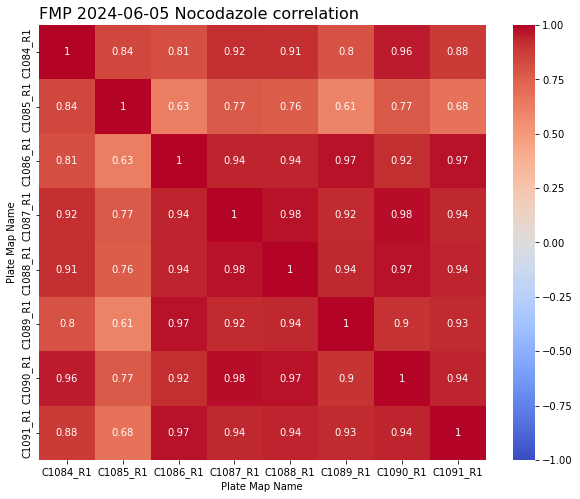

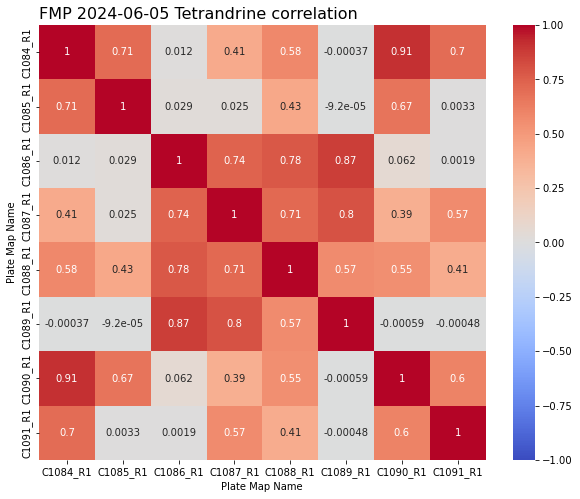

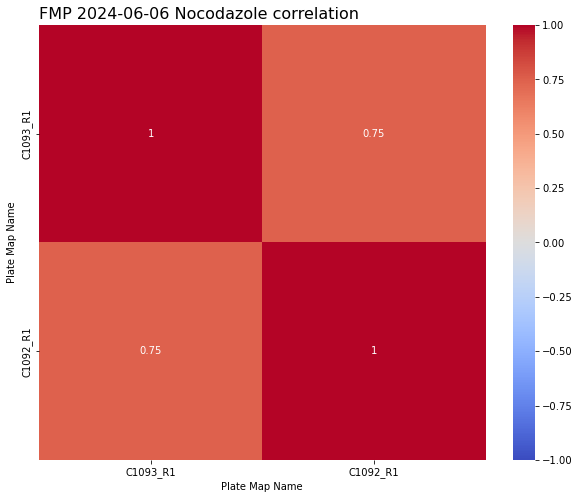

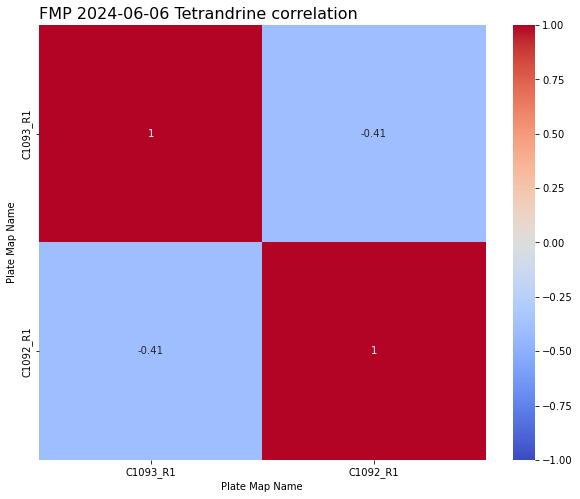

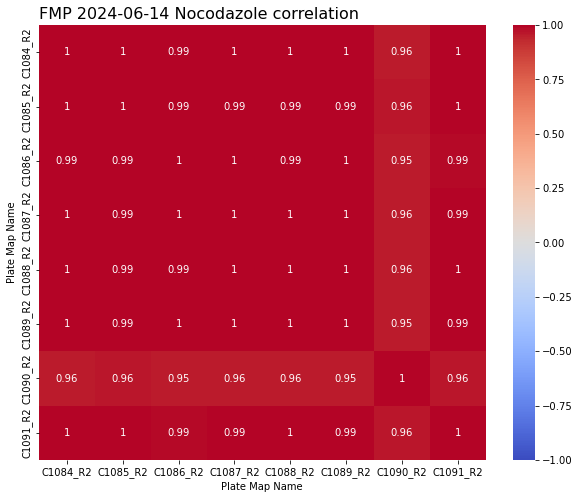

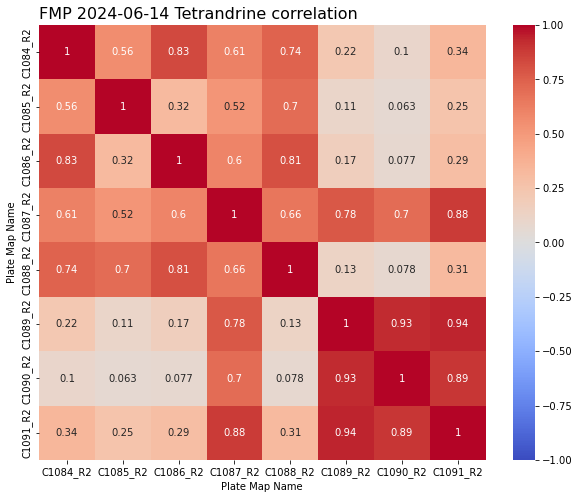

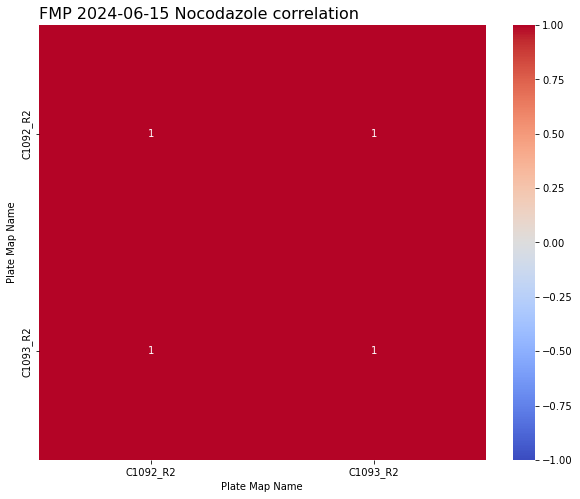

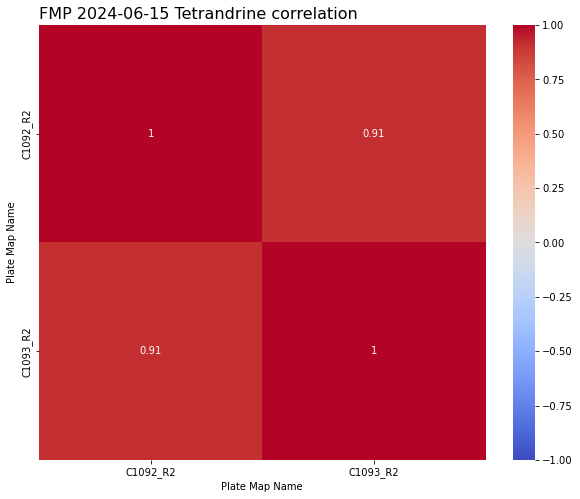

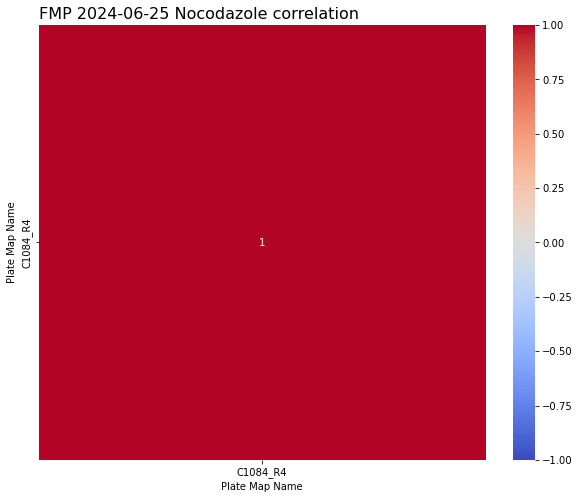

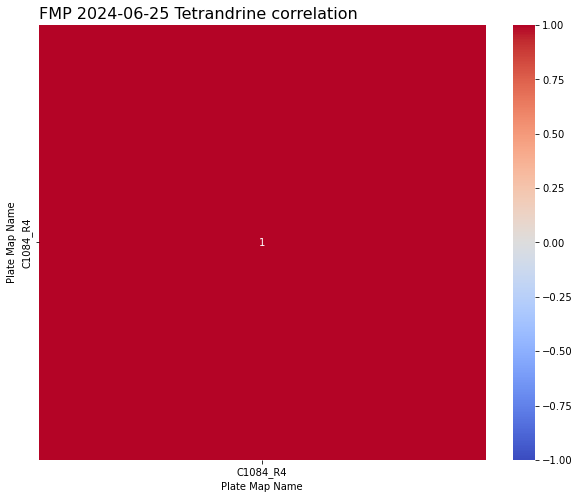

In [110]:
source_list = Data_aggregated['Metadata_source'].unique()

for source in source_list:

    source_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == source].reset_index()

    # Compute the mean profiles for pos. controls put into new table
    source_pos_ctrl = source_Data_aggregated[source_Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]


    source_pos_ctrl_mean = source_pos_ctrl.groupby(['Metadata_imaging_date',
                                                    'Metadata_imaging_time',
                                                    'Metadata_Plate',
                                                    'Metadata_plate_map_name',
                                                    'Metadata_plate_name',
                                                    'Metadata_replicate_number',
                                                    'Metadata_source',
                                                    'Metadata_user',
                                                    'Metadata_RoughID'])[features_columns].mean().reset_index()
    
    batch_list = source_pos_ctrl_mean["Metadata_imaging_date"].unique()

    for batch in batch_list:

        batch_source_Data_aggregated = source_pos_ctrl_mean.loc[source_pos_ctrl_mean["Metadata_imaging_date"] == batch].reset_index()

        ctrl_list = ('Nocodazole', 'Tetrandrine')

        for ctrl in ctrl_list:

            batch_source_Data_aggregated_ctrl = batch_source_Data_aggregated.loc[batch_source_Data_aggregated['Metadata_RoughID'] == ctrl].reset_index()

            batch_source_Data_aggregated_ctrl_2 = batch_source_Data_aggregated_ctrl.drop(columns_to_drop, axis=1)
            correlation_ctrl = batch_source_Data_aggregated_ctrl_2.set_index('Metadata_plate_map_name')
            correlation_ctrl_matrix = correlation_ctrl.T.corr()

            # Plot the correlation matrix using a heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_ctrl_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title(source + " " + batch + " " + ctrl + " correlation", loc = 'left',fontsize= 16)
            plt.xlabel('Plate Map Name')
            plt.ylabel('Plate Map Name')

            # Cell Number output for FMP
            figure_path = os.path.join(output_path + os.sep + source)  

            try:
                os.mkdir(figure_path)
            
            except OSError as error:
            
                print("Error: directory cannot be created") 

            plt.savefig(figure_path + os.sep + batch + '_' + source + '_' + ctrl + '_IntraBatchCorr.pdf', format='pdf', bbox_inches = "tight")
    


# Compute correlation matrix over different batches

In [115]:
source_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == 'USC'].reset_index()

# Compute the mean profiles for pos. controls put into new table
source_pos_ctrl = source_Data_aggregated[source_Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]

source_pos_ctrl_mean = source_pos_ctrl.groupby(['Metadata_imaging_date',
                                                    'Metadata_source',
                                                    'Metadata_RoughID'])[features_columns].mean().reset_index()

In [116]:
source_pos_ctrl_mean.head()

,Metadata_imaging_date,Metadata_source,Metadata_user,Metadata_RoughID,Nuc_AreaShape_Area,Nuc_AreaShape_BoundingBoxArea,Nuc_AreaShape_BoundingBoxMaximum_X,Nuc_AreaShape_BoundingBoxMaximum_Y,Nuc_AreaShape_BoundingBoxMinimum_X,Nuc_AreaShape_BoundingBoxMinimum_Y,...,Cyto_Texture_Variance_Mito_10_02_256,Cyto_Texture_Variance_Mito_10_03_256,Cyto_Texture_Variance_Mito_3_00_256,Cyto_Texture_Variance_Mito_3_01_256,Cyto_Texture_Variance_Mito_3_02_256,Cyto_Texture_Variance_Mito_3_03_256,Cyto_Texture_Variance_Mito_5_00_256,Cyto_Texture_Variance_Mito_5_01_256,Cyto_Texture_Variance_Mito_5_02_256,Cyto_Texture_Variance_Mito_5_03_256
0,2024-06-14,USC,Anton,Nocodazole,6.470896,7.895509,0.111530,-0.174868,0.108124,-0.216801,...,-0.937580,-1.012390,-0.969892,-0.960170,-0.971536,-0.985792,-0.987485,-0.954838,-0.933227,-0.968240
1,2024-06-14,USC,Anton,Tetrandrine,0.906347,2.261528,1.874766,0.749434,1.838116,0.656424,...,0.632706,0.639630,0.637606,0.670696,0.657087,0.647939,0.684765,0.669250,0.652232,0.657923
2,2024-06-14,USC,Daniel,Nocodazole,8.397008,8.768089,0.649391,0.046647,0.650265,0.101171,...,-0.563410,-0.615897,-0.604394,-0.624027,-0.609520,-0.614051,-0.627860,-0.621196,-0.583754,-0.596131
3,2024-06-14,USC,Daniel,Tetrandrine,-1.224522,-1.758909,0.342248,0.222386,0.328182,0.288506,...,1.828237,1.711900,1.720159,1.744210,1.789509,1.756358,1.744704,1.771488,1.770669,1.784121
4,2024-06-15,USC,Anton,Nocodazole,12.112730,12.500562,-2.145255,0.262789,-2.196652,0.224830,...,1.904385,2.012964,1.893453,1.853226,1.790635,1.900208,1.916838,1.833404,1.784213,1.998938


Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created
Error: directory cannot be created


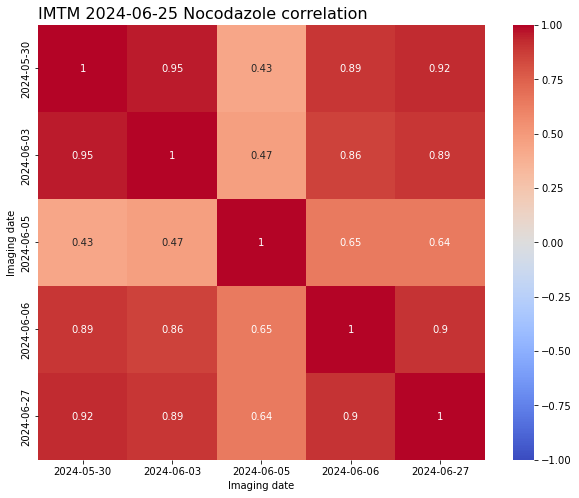

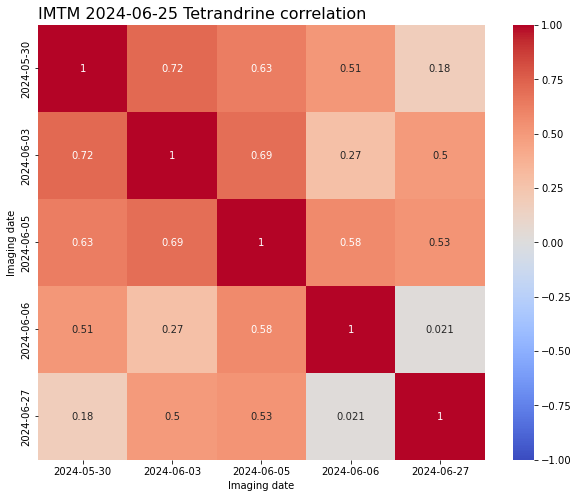

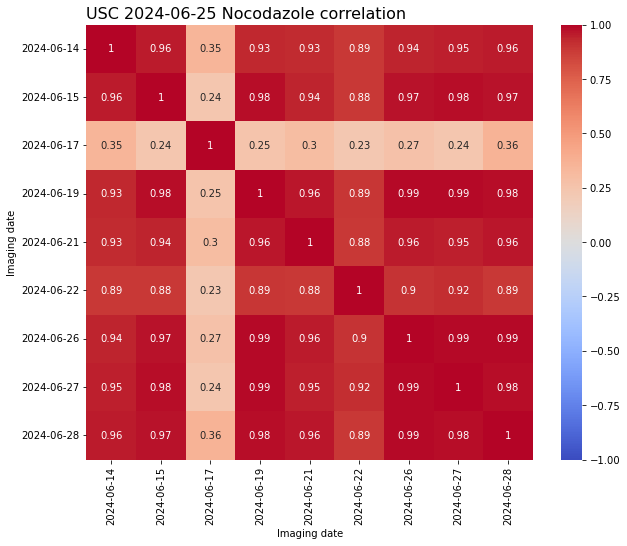

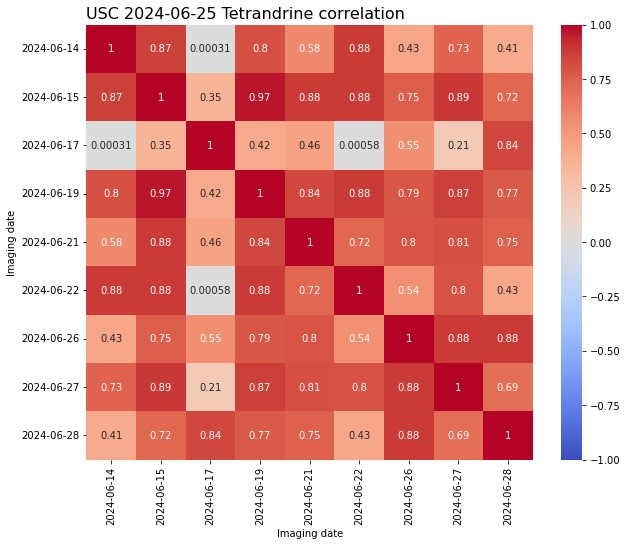

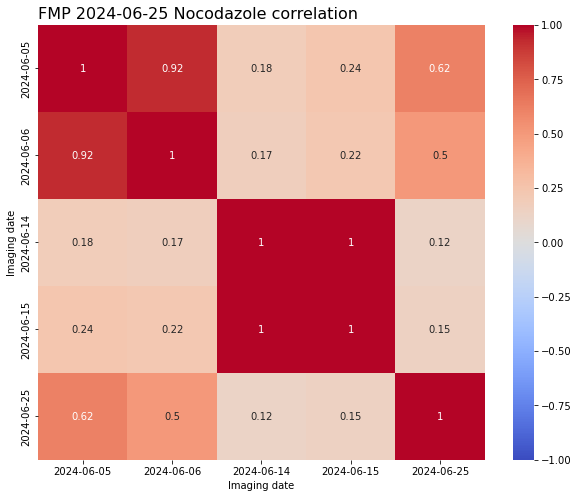

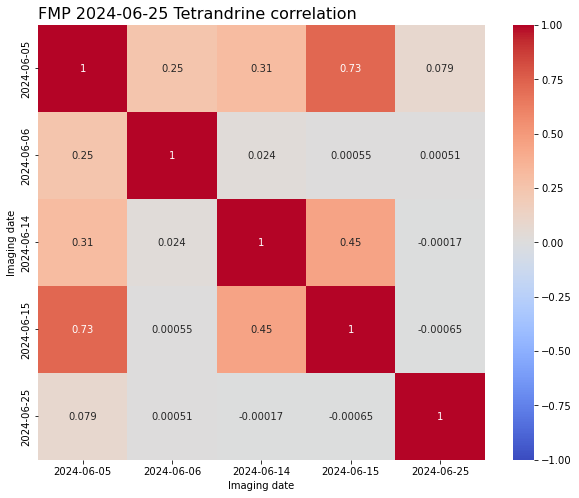

In [118]:
columns_to_drop = [
    'Metadata_source',
    'Metadata_RoughID']

source_list = Data_aggregated['Metadata_source'].unique()

for source in source_list:

    source_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == source].reset_index()

    # Compute the mean profiles for pos. controls put into new table
    source_pos_ctrl = source_Data_aggregated[source_Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]


    source_pos_ctrl_mean = source_pos_ctrl.groupby(['Metadata_imaging_date',
                                                    'Metadata_source',
                                                    'Metadata_RoughID'])[features_columns].mean().reset_index()

    ctrl_list = ('Nocodazole', 'Tetrandrine')

    for ctrl in ctrl_list:
        
        source_Data_aggregated_ctrl = source_pos_ctrl_mean.loc[source_pos_ctrl_mean['Metadata_RoughID'] == ctrl].reset_index()

        source_Data_aggregated_ctrl_2 = source_Data_aggregated_ctrl.drop(columns_to_drop, axis=1)
        correlation_ctrl = source_Data_aggregated_ctrl_2.set_index('Metadata_imaging_date')
        correlation_ctrl_matrix = correlation_ctrl.T.corr()

        # Plot the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_ctrl_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(source + " " + batch + " " + ctrl + " correlation", loc = 'left',fontsize= 16)
        plt.xlabel('Imaging date')
        plt.ylabel('Imaging date')

        # Cell Number output for FMP
        figure_path = os.path.join(output_path + os.sep + source)  

        try:
            os.mkdir(figure_path)
            
        except OSError as error:
            
            print("Error: directory cannot be created") 

        plt.savefig(figure_path + os.sep + source + '_' + ctrl + '_InterBatchCorr.pdf', format='pdf', bbox_inches = "tight")
    


# Correlation to reference

In [ ]:
# TODO: correlations of all plates to reference profile

In [ ]:
# These two plates have good per well agreement for Tet and Noco
FMP_ref_plate = ['C1088_R1', 'C1084_R1']

FMP_ref_plate_profiles = FMP_pos_ctrl_mean[FMP_pos_ctrl_mean['Metadata_plate_map_name'].isin(FMP_ref_plate)]

FMP_ref_plate_profiles_mean = FMP_ref_plate_profiles.groupby(['Metadata_RoughID'])[FMP_pos_ctrl_features_columns].mean().reset_index()

FMP_ref_plate_profiles_mean_features = FMP_ref_plate_profiles_mean .loc[FMP_pos_ctrl_mean['Metadata_RoughID'] == 'Nocodazole'][FMP_pos_ctrl_features_columns]

In [ ]:
FMP_pos_ctrl_mean_noco = FMP_pos_ctrl_mean.loc[FMP_pos_ctrl_mean['Metadata_RoughID'] == 'Nocodazole']
FMP_pos_ctrl_mean_noco

In [ ]:
def get_pariwise_correlation(ref_features, test_features):
    
    corr = np.corrcoef(ref_features.astype(float), test_features.astype(float))
    np.fill_diagonal(corr, np.nan)

    return np.nanmedian(corr)

In [ ]:
plate_list = FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"].unique()

imaging_date = []
plate_map_name = []
correlation = []

for plate_map in plate_list:

    FMP_noco_features_plate = FMP_pos_ctrl_mean_noco.loc[FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"] == plate_map][FMP_pos_ctrl_features_columns]

    test = FMP_pos_ctrl_mean_noco.loc[FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"] == plate_map]['Metadata_imaging_date'].reset_index()
    imaging_date.append(test['Metadata_imaging_date'][0])
    plate_map_name.append(plate_map)
    correlation.append(get_pariwise_correlation(FMP_ref_plate_profiles_mean_features, FMP_noco_features_plate))


quality_control_2 = {
    'Metadata_imaging_date': imaging_date,
    'Metadata_plate_map_name': plate_map_name,
    'Correlation': correlation

}

quality_control_2_df = pd.DataFrame(quality_control_2)

In [ ]:
quality_control_2_df.sort_values(by='Metadata_imaging_date')

plt.figure(figsize=(14, 7))

sns.barplot(quality_control_2_df, x="Correlation", y="Metadata_plate_map_name", hue="Metadata_imaging_date")

In [ ]:
# This does not really work. But lets still do that. In particular in reference to the bioactives
# Maybe better when computing consensus values then.
# Maybe computing an average over the batch and then doing the correlation matrix is more informative
# Still need to check feature reduction methods > maybe this is a problem
# Might be we need to also explore feature extraction methods